# Exercizes on clustering

Here you can find a program to read a data file in csv format. 

The data file has the following heading:
    number of samples, number of features
    list of the names of the features (separated by comma)
    
The remaining lines contain an example per row.
For each row there is a list of real numbers (commas separated) which are the feature values.   

In [1]:
import csv
import sys
from os.path import join

import numpy as np

# this function reads the data file, loads the configuration attributes specifiefd in the heading
# (numer of examples and features), the list of feature names
# and loads the data in a matrix named data    
def load_data(file_path, file_name):
    with open(join(file_path, file_name)) as csv_file:
        data_file = csv.reader(csv_file,delimiter=',')
        temp1 = next(data_file)
        n_samples = int(temp1[0])
        print("n_samples=")
        print(n_samples)
        n_features = int(temp1[1])
        temp2 = next(data_file)
        feature_names = np.array(temp2[:n_features])

        data_list = [iter for iter in data_file]
                
        data = np.asarray(data_list, dtype=np.float64)                  
        
    return(data,feature_names,n_samples,n_features)

# The main program reads the input file containing the dataset
# file_path is the file path where the file with the data to be read are located
# we assume the file contains an example per line
# each example is a list of real values separated by a comma (csv format)
# The first line of the file contains the heading with:
# N_samples,n_features,
# The second line contains the feature names separated by a comma     

#file_path="content/"
file_path="../../Datasets/"
# all the three datasets contain data points on (x,y) 
file_name1="3-clusters.csv"
file_name2="dataset-DBSCAN.csv"     
file_name3="CURE-complete.csv"    
data1,feature_names1,n_samples1,n_features1 = load_data(file_path, file_name1)
data2,feature_names2,n_samples2,n_features2 = load_data(file_path, file_name2)
data3,feature_names3,n_samples3,n_features3 = load_data(file_path, file_name3)
print("dataset n. 1: n samples, n features")
print(n_samples1, n_features1)
print("dataset n. 2: n samples, n features")
print(n_samples2, n_features2)
print("dataset n. 3: n samples, n features")
print(n_samples3, n_features3)

n_samples=
150
n_samples=
6118
n_samples=
86558
dataset n. 1: n samples, n features
150 2
dataset n. 2: n samples, n features
6118 2
dataset n. 3: n samples, n features
86558 2


The following program plots the dataset n.1

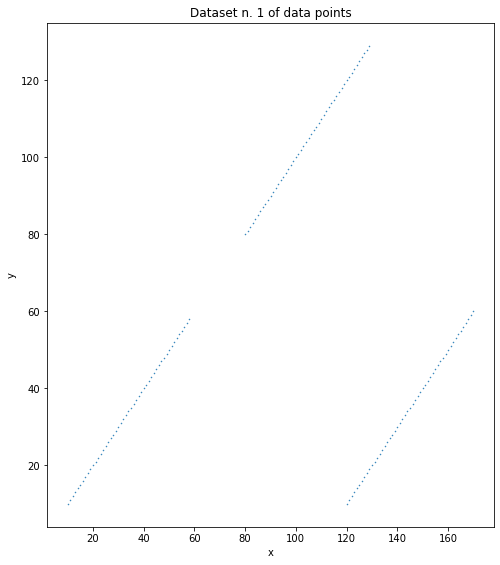

In [2]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Dataset n. 1 of data points')

ax.set_xlabel(feature_names1[0])
ax.set_ylabel(feature_names1[1])

#plot the dataset
plt.plot(data1[:,0], data1[:,1], '.',markersize=1)

plt.show()

The following is the program for plotting the dataset n.2

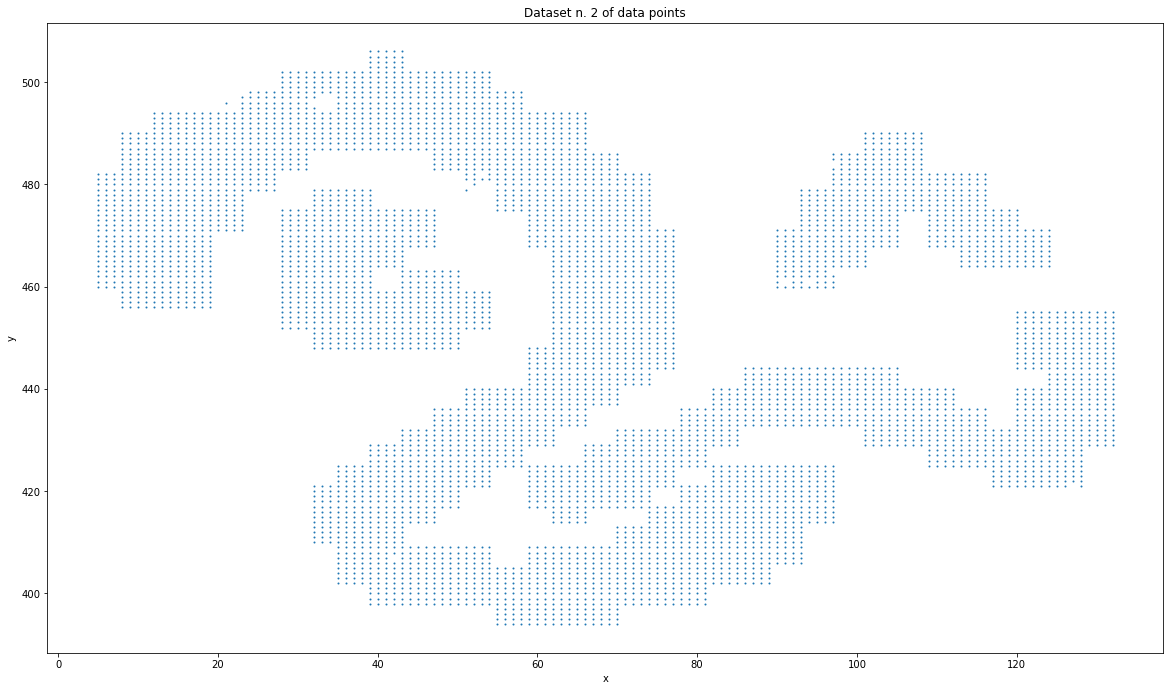

In [3]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Dataset n. 2 of data points')

ax.set_xlabel(feature_names2[0])
ax.set_ylabel(feature_names2[1])

#plot the dataset
plt.plot(data2[:,0], data2[:,1], '.', markersize=2)

plt.show()

The following is the program for plotting the dataset n.3

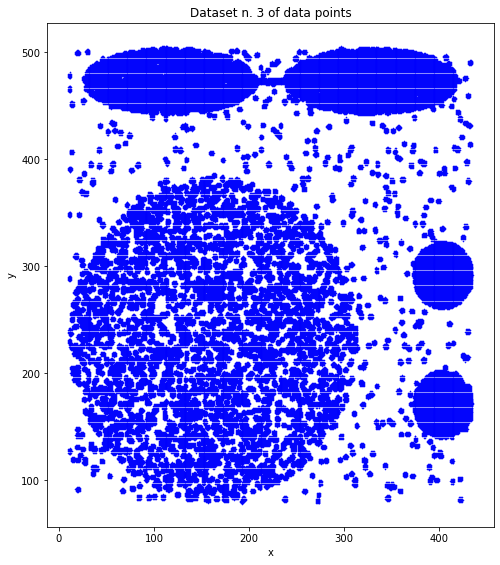

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Dataset n. 3 of data points')

ax.set_xlabel(feature_names3[0])
ax.set_ylabel(feature_names3[1])

#plot the dataset
plt.plot(data3[:,0], data3[:,1], '.', markersize=1.2, markeredgecolor = 'blue')

plt.show()

## In the following program we cluster the dataset n.1 with K-means. 
From the plot of dataset n.1 we see 3 separated clusters. Thus k=3. 

In [5]:
import csv
import sys
from os.path import join

import numpy as np

def load_data(file_path, file_name):
    with open(join(file_path, file_name)) as csv_file:
        data_file = csv.reader(csv_file,delimiter=',')
        temp1 = next(data_file)
        n_samples = int(temp1[0])
        n_features = int(temp1[1])
        temp2 = next(data_file)
        feature_names = np.array(temp2[:n_features])

        data_list = [iter for iter in data_file]
                
        data = np.asarray(data_list, dtype=np.float64)                  
        
    return(data,feature_names,n_samples,n_features)

# The main program reads the input file containing the dataset
# file_path is the file path where the file with the data to be read are located
# we assume the file contains an example per line
# each example is a list of real values separated by a comma (csv format)
# The first line of the file contains the heading with:
# N_samples,n_features,
# The second line contains the feature names separated by a comma     

#file_path="~/meo/Documents/Didattica/Laboratorio-15-16-Jupyter/"
# file_path="./sample_data/"
# # all the three datasets contain data points on (x,y) 
# file_name1="3-clusters.csv"

data1,feature_names1,n_samples1,n_features1 = load_data(file_path, file_name1)

from sklearn.cluster import KMeans

np.random.seed(5)

k=3
kmeans1 = KMeans(n_clusters=k, random_state=0).fit(data1)

i=0
for i in range(n_samples1):
    print("Example n."+str(i)+"=("+str(data1[i,0])+","+str(data1[i,1])+")")
    print("in cluster n."+str(kmeans1.labels_[i]))

Example n.0=(10.0,10.0)
in cluster n.0
Example n.1=(11.0,11.0)
in cluster n.0
Example n.2=(12.0,12.0)
in cluster n.0
Example n.3=(13.0,13.0)
in cluster n.0
Example n.4=(14.0,14.0)
in cluster n.0
Example n.5=(15.0,15.0)
in cluster n.0
Example n.6=(16.0,16.0)
in cluster n.0
Example n.7=(17.0,17.0)
in cluster n.0
Example n.8=(18.0,18.0)
in cluster n.0
Example n.9=(19.0,19.0)
in cluster n.0
Example n.10=(20.0,20.0)
in cluster n.0
Example n.11=(21.0,21.0)
in cluster n.0
Example n.12=(22.0,22.0)
in cluster n.0
Example n.13=(23.0,23.0)
in cluster n.0
Example n.14=(24.0,24.0)
in cluster n.0
Example n.15=(25.0,25.0)
in cluster n.0
Example n.16=(26.0,26.0)
in cluster n.0
Example n.17=(27.0,27.0)
in cluster n.0
Example n.18=(28.0,28.0)
in cluster n.0
Example n.19=(29.0,29.0)
in cluster n.0
Example n.20=(30.0,30.0)
in cluster n.0
Example n.21=(31.0,31.0)
in cluster n.0
Example n.22=(32.0,32.0)
in cluster n.0
Example n.23=(33.0,33.0)
in cluster n.0
Example n.24=(34.0,34.0)
in cluster n.0
Example n.

In the following program we plot the clusters

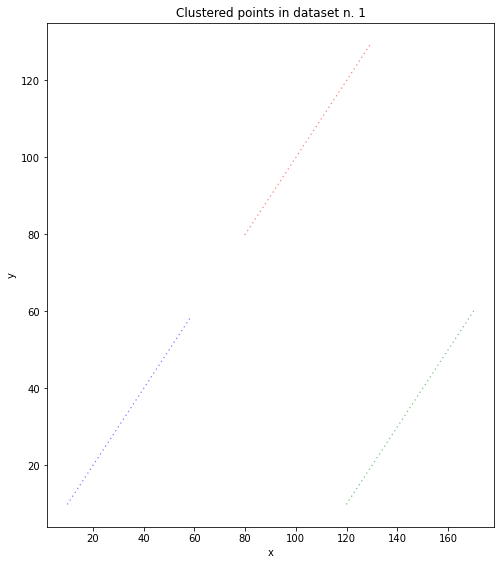

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Clustered points in dataset n. 1')

ax.set_xlabel('x')
ax.set_ylabel('y')

# set the list of colors to be selected when plotting the different clusters
color=['b','g','r','c','m','y','k','w']
    
#plot the dataset
for clu in range(k):
    # collect the sequence of cooordinates of the points in each given cluster (determined by clu)
    data_list_x = [data1[i,0] for i in range(n_samples1) if kmeans1.labels_[i]==clu]
    data_list_y = [data1[i,1] for i in range(n_samples1) if kmeans1.labels_[i]==clu]
    plt.scatter(data_list_x, data_list_y, s=2, edgecolors='none', c=color[clu], alpha=0.5)

plt.show()

In the following cell I propose you to perform clustering with K-means on dataset2.

In [7]:
data2, feature_names2, n_samples2, n_features2 = load_data(file_path=file_path, file_name=file_name2)


k=3
kmeans2 = KMeans(n_clusters=k, random_state=0).fit(data2)

i=0
for i in range(n_samples2):
    print("Example n."+str(i)+"=("+str(data2[i,0])+","+str(data2[i,1])+")")
    print("in cluster n."+str(kmeans2.labels_[i]))

Example n.0=(5.0,482.0)
in cluster n.2
Example n.1=(5.0,481.0)
in cluster n.2
Example n.2=(5.0,480.0)
in cluster n.2
Example n.3=(5.0,479.0)
in cluster n.2
Example n.4=(5.0,478.0)
in cluster n.2
Example n.5=(5.0,477.0)
in cluster n.2
Example n.6=(5.0,476.0)
in cluster n.2
Example n.7=(5.0,475.0)
in cluster n.2
Example n.8=(5.0,474.0)
in cluster n.2
Example n.9=(5.0,473.0)
in cluster n.2
Example n.10=(5.0,472.0)
in cluster n.2
Example n.11=(5.0,471.0)
in cluster n.2
Example n.12=(5.0,470.0)
in cluster n.2
Example n.13=(5.0,469.0)
in cluster n.2
Example n.14=(5.0,468.0)
in cluster n.2
Example n.15=(5.0,467.0)
in cluster n.2
Example n.16=(5.0,466.0)
in cluster n.2
Example n.17=(5.0,465.0)
in cluster n.2
Example n.18=(5.0,464.0)
in cluster n.2
Example n.19=(5.0,463.0)
in cluster n.2
Example n.20=(5.0,462.0)
in cluster n.2
Example n.21=(5.0,461.0)
in cluster n.2
Example n.22=(5.0,460.0)
in cluster n.2
Example n.23=(6.0,482.0)
in cluster n.2
Example n.24=(6.0,481.0)
in cluster n.2
Example n.

In the following you have to plot clustering results on dataset2.

**Answer:** 
how do you explain what it happens?

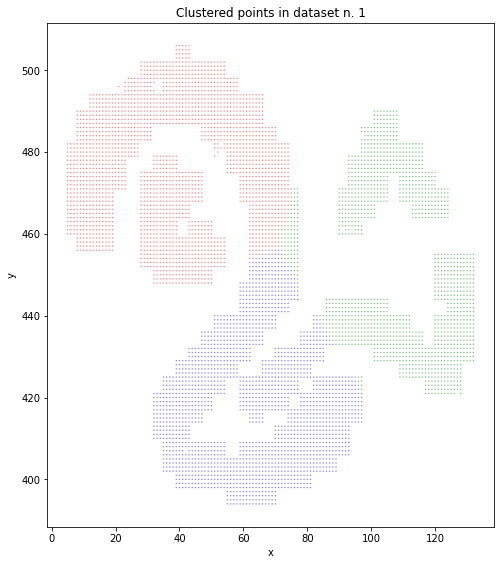

In [8]:
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Clustered points in dataset n. 1')

ax.set_xlabel('x')
ax.set_ylabel('y')

# set the list of colors to be selected when plotting the different clusters
color=['b','g','r','c','m','y','k','w']
    
#plot the dataset
for clu in range(k):
    # collect the sequence of cooordinates of the points in each given cluster (determined by clu)
    data_list_x = [data2[i,0] for i in range(n_samples2) if kmeans2.labels_[i]==clu]
    data_list_y = [data2[i,1] for i in range(n_samples2) if kmeans2.labels_[i]==clu]
    plt.scatter(data_list_x, data_list_y, s=2, edgecolors='none', c=color[clu], alpha=0.5)

plt.show()

In the following cell I propose you to perform clustering with K-means on the dataset3.

In [9]:
data3, feature_names3, n_samples3, n_features3 = load_data(file_path=file_path, file_name=file_name3)


k=3
kmeans3 = KMeans(n_clusters=k, random_state=0).fit(data3)

i=0
# for i in range(n_samples3):
#     print("Example n."+str(i)+"=("+str(data3[i,0])+","+str(data3[i,1])+")")
#     print("in cluster n."+str(kmeans3.labels_[i]))

In the following cell, I propose you to plot clustering results on dataset3.

**Answer:** 
how do you explain what it happens?

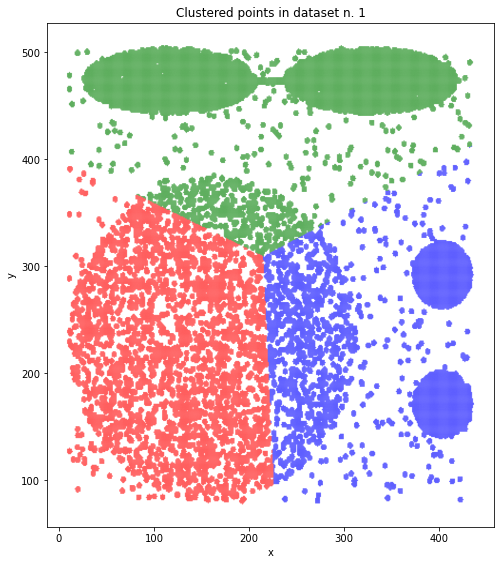

In [10]:
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Clustered points in dataset n. 1')

ax.set_xlabel('x')
ax.set_ylabel('y')

# set the list of colors to be selected when plotting the different clusters
color=['b','g','r','c','m','y','k','w']
    
#plot the dataset
for clu in range(k):
    # collect the sequence of cooordinates of the points in each given cluster (determined by clu)
    data_list_x = [data3[i,0] for i in range(n_samples3) if kmeans3.labels_[i]==clu]
    data_list_y = [data3[i,1] for i in range(n_samples3) if kmeans3.labels_[i]==clu]
    plt.scatter(data_list_x, data_list_y, s=2, edgecolors='none', c=color[clu], alpha=0.5)

plt.show()

In the following cells I propose you to write a program that computes with a statistical measure of your choice a quantitative evaluation of clusters in the three datasets.

**Note:**
It is advisable to execute K-means a certain number of times (let us try 10 times) and then select the clustering solution that gives the best value of the evaluation measure.

### Dataset 1

In [11]:
from sklearn.metrics import silhouette_score

n_trials = 10
best_sh_score = 0
best_k = 0
avg_silhouette_vals = list()

for k in range(2, n_trials):
    kmeans1 = KMeans(n_clusters=k, random_state=0).fit(data1)
    silhouette = silhouette_score(X=data1, labels=kmeans1.labels_)
    print(f"Average Silohuette Score for {k} clusters: {silhouette}")
    avg_silhouette_vals.append(silhouette)
    if best_sh_score < silhouette:
        best_sh_score = silhouette
        best_k = k

print(f'Best k for Dataset: {best_k} with silhouette score: {best_sh_score}')

# plot Kmeans with best k
kmeans1 = KMeans(n_clusters=best_k, random_state=0).fit(data1)




Average Silohuette Score for 2 clusters: 0.5651096232579514
Average Silohuette Score for 3 clusters: 0.7229402453727759
Average Silohuette Score for 4 clusters: 0.6825234611999134
Average Silohuette Score for 5 clusters: 0.6372722940289592
Average Silohuette Score for 6 clusters: 0.6113126050223654
Average Silohuette Score for 7 clusters: 0.595587703417737
Average Silohuette Score for 8 clusters: 0.5796286284346166
Average Silohuette Score for 9 clusters: 0.5656056915357077
Best k for Dataset: 3 with silhouette score: 0.7229402453727759


As already done with classification by k-nn, plot in the cell below the quantitative measure of your choice (used above) with respect to an increasing value of k (the number of clusters) so that the best value of k can be selected.

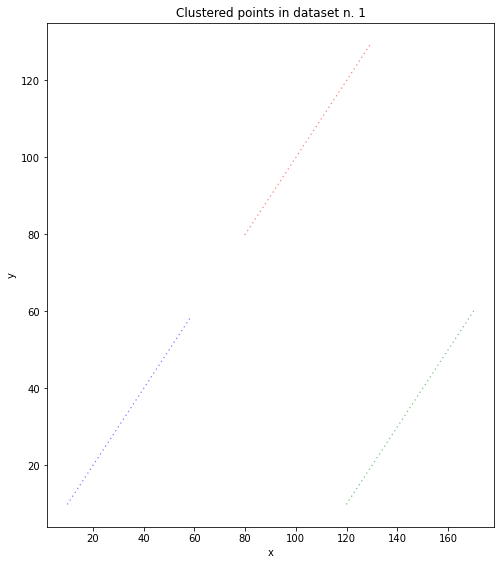

In [12]:
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Clustered points in dataset n. 1')

ax.set_xlabel('x')
ax.set_ylabel('y')

# set the list of colors to be selected when plotting the different clusters
color=['b','g','r','c','m','y','k','w']
    
#plot the dataset
for clu in range(best_k):
    # collect the sequence of cooordinates of the points in each given cluster (determined by clu)
    data_list_x = [data1[i,0] for i in range(n_samples1) if kmeans1.labels_[i]==clu]
    data_list_y = [data1[i,1] for i in range(n_samples1) if kmeans1.labels_[i]==clu]
    plt.scatter(data_list_x, data_list_y, s=2, edgecolors='none', c=color[clu], alpha=0.5)



plt.show()

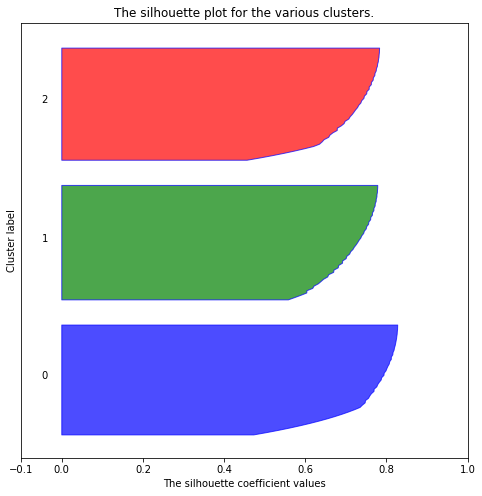

In [13]:
fig = plt.figure(figsize=(8,8))

ax1 = fig.add_subplot(111)
color=['b','g','r','c','m','y','k','w']
# Silhouette subplot
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, n_samples1 + (best_k + 1)*10])

silhouette_values = silhouette_samples(data1, kmeans1.labels_)

y_lower = 10
for i in range(best_k):
    ith_cluster_labels = kmeans1.labels_[kmeans1.labels_ == i]
    ith_cluster_silhouettes = np.array([silhouette_values[j] for j in range(n_samples1) if kmeans1.labels_[j] == i])
    ith_cluster_silhouettes.sort()

    y_upper = y_lower + ith_cluster_silhouettes.shape[0]

    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                    0, ith_cluster_silhouettes,
                    facecolor=color[i], edgecolor=color, alpha=0.7)
    ax1.text(-0.05, y_lower + 0.5 * ith_cluster_labels.shape[0], str(i))

    y_lower = y_upper + 10 

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

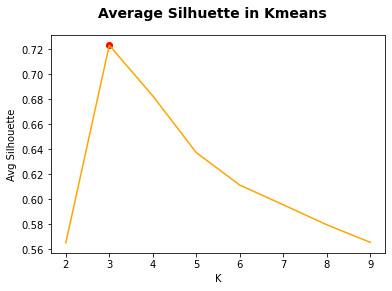

In [14]:
fig = plt.figure()
fig.suptitle('Average Silhuette in Kmeans', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
ax.set_xlabel('K')
ax.set_ylabel('Avg Silhouette')
plt.plot([i for i in range(2,n_trials)], avg_silhouette_vals, color='orange')
plt.scatter(best_k, best_sh_score, color='red')

In [15]:
from sklearn.metrics import silhouette_score

n_trials = 10
best_sh_score = 0
best_k = 0
avg_silhouette_vals = list()

for k in range(2, n_trials):
    kmeans2 = KMeans(n_clusters=k, random_state=0).fit(data2)
    silhouette = silhouette_score(X=data2, labels=kmeans2.labels_)
    print(f"Average Silohuette Score for {k} clusters: {silhouette}")
    avg_silhouette_vals.append(silhouette)
    if best_sh_score < silhouette:
        best_sh_score = silhouette
        best_k = k

print(f'Best k for Dataset: {best_k} with silhouette score: {best_sh_score}')

# plot Kmeans with best k
kmeans2 = KMeans(n_clusters=best_k, random_state=0).fit(data2)




Average Silohuette Score for 2 clusters: 0.43322366812579544
Average Silohuette Score for 3 clusters: 0.47976552787937193
Average Silohuette Score for 4 clusters: 0.4165945460308033
Average Silohuette Score for 5 clusters: 0.4256111365510684
Average Silohuette Score for 6 clusters: 0.41166328241333594
Average Silohuette Score for 7 clusters: 0.4337052476160541
Average Silohuette Score for 8 clusters: 0.4452323942316648
Average Silohuette Score for 9 clusters: 0.44730945661779126
Best k for Dataset: 3 with silhouette score: 0.47976552787937193


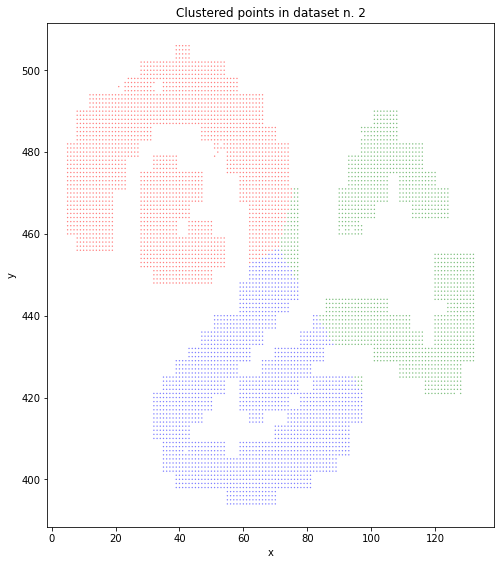

In [16]:
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Clustered points in dataset n. 2')

ax.set_xlabel('x')
ax.set_ylabel('y')

# set the list of colors to be selected when plotting the different clusters
color=['b','g','r','c','m','y','k','w']
    
#plot the dataset
for clu in range(best_k):
    # collect the sequence of cooordinates of the points in each given cluster (determined by clu)
    data_list_x = [data2[i,0] for i in range(n_samples2) if kmeans2.labels_[i]==clu]
    data_list_y = [data2[i,1] for i in range(n_samples2) if kmeans2.labels_[i]==clu]
    plt.scatter(data_list_x, data_list_y, s=2, edgecolors='none', c=color[clu], alpha=0.5)



plt.show()

As already done with classification by k-nn, plot in the cell below the quantitative measure of your choice (used above) with respect to an increasing value of k (the number of clusters) so that the best value of k can be selected.

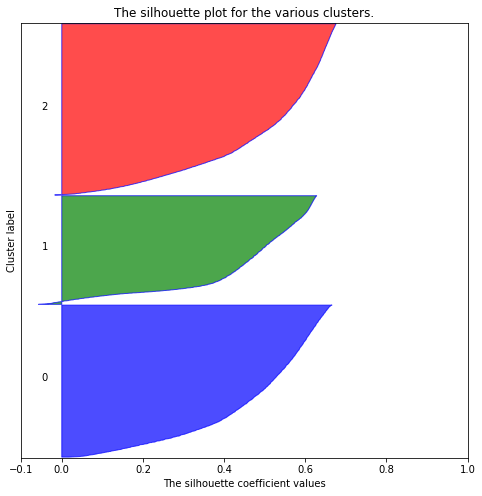

In [17]:
fig = plt.figure(figsize=(8,8))

ax1 = fig.add_subplot(111)
color=['b','g','r','c','m','y','k','w']
# Silhouette subplot
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, n_samples2 + (best_k + 1)*10])

silhouette_values = silhouette_samples(data2, kmeans2.labels_)

y_lower = 10
for i in range(best_k):
    ith_cluster_labels = kmeans2.labels_[kmeans2.labels_ == i]
    ith_cluster_silhouettes = np.array([silhouette_values[j] for j in range(n_samples2) if kmeans2.labels_[j] == i])
    ith_cluster_silhouettes.sort()

    y_upper = y_lower + ith_cluster_silhouettes.shape[0]

    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                    0, ith_cluster_silhouettes,
                    facecolor=color[i], edgecolor=color, alpha=0.7)
    ax1.text(-0.05, y_lower + 0.5 * ith_cluster_labels.shape[0], str(i))

    y_lower = y_upper + 10 

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

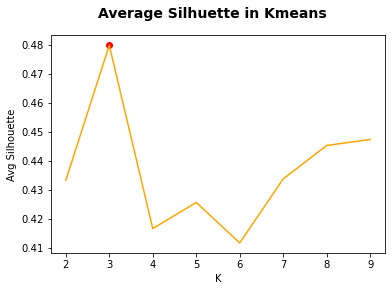

In [18]:
fig = plt.figure()
fig.suptitle('Average Silhuette in Kmeans', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
ax.set_xlabel('K')
ax.set_ylabel('Avg Silhouette')
plt.plot([i for i in range(2,n_trials)], avg_silhouette_vals, color='orange')
plt.scatter(best_k, best_sh_score, color='red')

## Dataset 3

In [19]:
from sklearn.metrics import silhouette_score

n_trials = 10
best_sh_score = 0
best_k = 0
avg_silhouette_vals = list()

for k in range(2, n_trials):
    kmeans3 = KMeans(n_clusters=k, random_state=0).fit(data3)
    silhouette = silhouette_score(X=data3, labels=kmeans3.labels_, sample_size=10000, random_state=42)
    print(f"Average Silohuette Score for {k} clusters: {silhouette}")
    avg_silhouette_vals.append(silhouette)

    if best_sh_score < silhouette:
        best_sh_score = silhouette
        best_k = k

print(f'Best k for Dataset: {best_k} with silhouette score: {best_sh_score}')

# plot Kmeans with best k
kmeans3 = KMeans(n_clusters=best_k, random_state=0).fit(data3)



Average Silohuette Score for 2 clusters: 0.38902183851259153
Average Silohuette Score for 3 clusters: 0.394808044847743
Average Silohuette Score for 4 clusters: 0.407690255604985
Average Silohuette Score for 5 clusters: 0.41298033356380254
Average Silohuette Score for 6 clusters: 0.4309624953693158
Average Silohuette Score for 7 clusters: 0.4225385459637836
Average Silohuette Score for 8 clusters: 0.4228262247468635
Average Silohuette Score for 9 clusters: 0.4204472648878269
Best k for Dataset: 6 with silhouette score: 0.4309624953693158


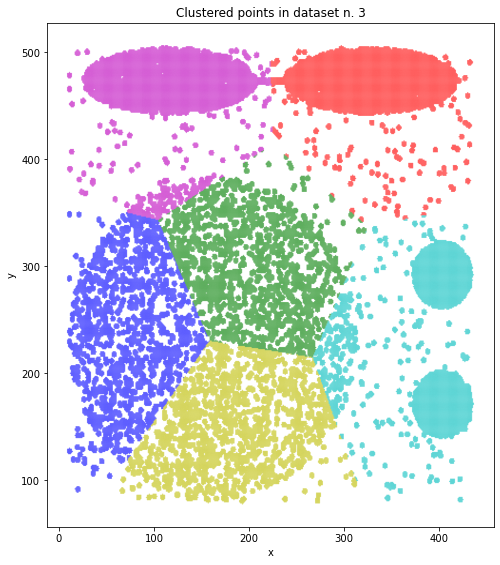

In [20]:
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Clustered points in dataset n. 3')

ax.set_xlabel('x')
ax.set_ylabel('y')

# set the list of colors to be selected when plotting the different clusters
color=['b','g','r','c','m','y','k','orange','purple']
    
#plot the dataset
for clu in range(best_k):
    # collect the sequence of cooordinates of the points in each given cluster (determined by clu)
    data_list_x = [data3[i,0] for i in range(n_samples3) if kmeans3.labels_[i]==clu]
    data_list_y = [data3[i,1] for i in range(n_samples3) if kmeans3.labels_[i]==clu]
    plt.scatter(data_list_x, data_list_y, s=2, edgecolors='none', c=color[clu], alpha=0.5)



plt.show()


As already done with classification by k-nn, plot in the cell below the quantitative measure of your choice (used above) with respect to an increasing value of k (the number of clusters) so that the best value of k can be selected.

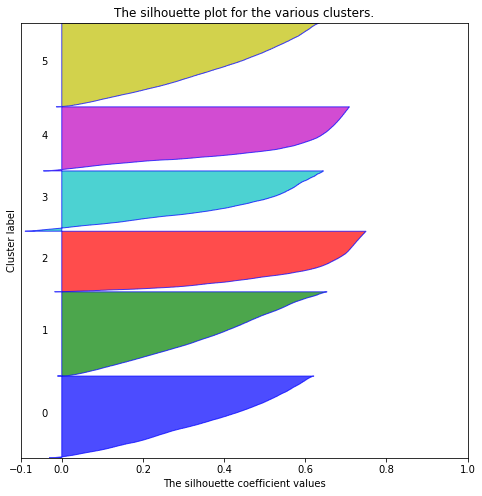

In [21]:
fig = plt.figure(figsize=(8,8))

ax1 = fig.add_subplot(111)
color=['b','g','r','c','m','y','k','orange','purple']# Silhouette subplot
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, n_samples3 + (best_k + 1)*10])

silhouette_values = silhouette_samples(data3, kmeans3.labels_)

y_lower = 10
for i in range(best_k):
    ith_cluster_labels = kmeans3.labels_[kmeans3.labels_ == i]
    ith_cluster_silhouettes = np.array([silhouette_values[j] for j in range(n_samples3) if kmeans3.labels_[j] == i])
    ith_cluster_silhouettes.sort()

    y_upper = y_lower + ith_cluster_silhouettes.shape[0]

    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                    0, ith_cluster_silhouettes,
                    facecolor=color[i], edgecolor=color, alpha=0.7)
    ax1.text(-0.05, y_lower + 0.5 * ith_cluster_labels.shape[0], str(i))

    y_lower = y_upper + 10 

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

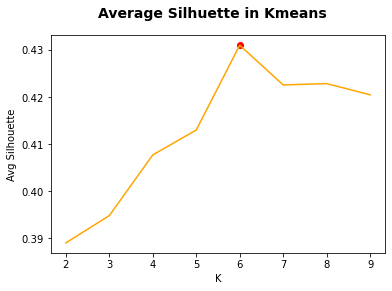

In [22]:
fig = plt.figure()
fig.suptitle('Average Silhuette in Kmeans', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
ax.set_xlabel('K')
ax.set_ylabel('Avg Silhouette')
plt.plot([i for i in range(2,n_trials)], avg_silhouette_vals, color='orange')
plt.scatter(best_k, best_sh_score, color='red')
plt.show()

In the following cell I propose you to run DBSCAN, instead, on one of the last two datasets: either dataset2 or dataset3. 

At the beginning try using a pair of Minpts and Eps of your choice.

**Note:**
If the data is too big, **sample it random, using a factor of 0.1.**

### Dataset 2

In [23]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import homogeneity_score

eps = 2.4
min_pts = 10

db = DBSCAN(eps=eps, min_samples=min_pts).fit(data2)
n_clusters = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
n_noise = db.labels_[db.labels_ == -1]

print(f'Number of clusters: {n_clusters}')
print(f'Number of noise points: {n_noise}')

print(f'Homogeneity score: {homogeneity_score(data2[:,1], db.labels_)}')




Number of clusters: 3
Number of noise points: []
Homogeneity score: 0.056346130462626445


In the following cell I propose you to: 

1.   Set *Minpts* to a number (say **10**).
2.   Compute the **reachability distance** of the **10-th nearest neighbour ** for each data-point.
3. Sort the set of reachability distances you obtained in an increasing way.
4. Plot the sorted reachability distances
5. Find the **elbow** of the diagram => it gives the eps value combined with Minpts=10.
6. Try this combined pair of parameters on the dataset you chose, with DBSCAN.